In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

plt.style.use('bmh')

import warnings
warnings.filterwarnings("ignore")

In [3]:
wdata = pd.read_csv("/Users/preethamvignesh/Desktop/OpenAq_Data/US_StateDailyAvg/California_DlyAvg_PM25.csv")

wdata.drop('Unnamed: 0',axis=1,inplace=True)

print(wdata.shape)
wdata.head()

(1226, 5)


,date,state,pm25,longitude,latitude
0,2018-01-01,California,25.318806,-121.493629,38.576668
1,2018-01-02,California,22.212212,-121.493629,38.576668
2,2018-01-03,California,24.836173,-121.493629,38.576668
3,2018-01-04,California,20.468300,-121.493629,38.576668
4,2018-01-05,California,12.290649,-121.493629,38.576668


In [4]:
ydata = wdata
ydata.date = pd.to_datetime(ydata['date'])
ydata = ydata[(ydata['date'] >= "02/01/2019") & (ydata['date'] <= "05-01-2020")]
ydata.set_index('date',inplace=True)
ydata

,state,pm25,longitude,latitude
date,,,,
2019-02-01,California,8.196943,-121.493629,38.576668
2019-02-02,California,4.638460,-121.493629,38.576668
2019-02-03,California,4.011010,-121.493629,38.576668
2019-02-04,California,3.659892,-121.493629,38.576668
2019-02-05,California,5.038119,-121.493629,38.576668
...,...,...,...,...
2020-04-27,California,7.082423,-121.493629,38.576668
2020-04-28,California,6.937705,-121.493629,38.576668
2020-04-29,California,7.157928,-121.493629,38.576668


In [5]:
wdata.tail()

,date,state,pm25,longitude,latitude
1221,2021-05-27,California,8.097262,-121.493629,38.576668
1222,2021-05-28,California,8.398243,-121.493629,38.576668
1223,2021-05-29,California,8.686022,-121.493629,38.576668
1224,2021-05-30,California,10.050406,-121.493629,38.576668
1225,2021-05-31,California,10.300450,-121.493629,38.576668


In [6]:
#dtype means decimal type (number type like float, int)
#Gather the decimal types on file to consider as numeric data types

numeric_var = [key for key in dict(wdata.dtypes) if dict(wdata.dtypes)[key] 
               in ['float64','float32','int32','int64']]

print("Numerical Variables: ",numeric_var)

#Getting the categorical variables (only objects)
cat_var = [key for key in dict(wdata.dtypes) if dict(wdata.dtypes)[key]
          in ['object']]
print("Categorical Variables: ",cat_var)

Numerical Variables:  ['pm25', 'longitude', 'latitude']
Categorical Variables:  ['state']


In [7]:
#Check whether the data is missing or NULL
total = wdata.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((wdata.isnull().sum(axis=0))/(wdata.isnull().count(axis=0))) * 100
missing_columns = pd.concat([total,percent], axis=1, keys=['Total','Percentage'])
missing_columns

,Total,Percentage
latitude,0,0.0
longitude,0,0.0
pm25,0,0.0
state,0,0.0
date,0,0.0


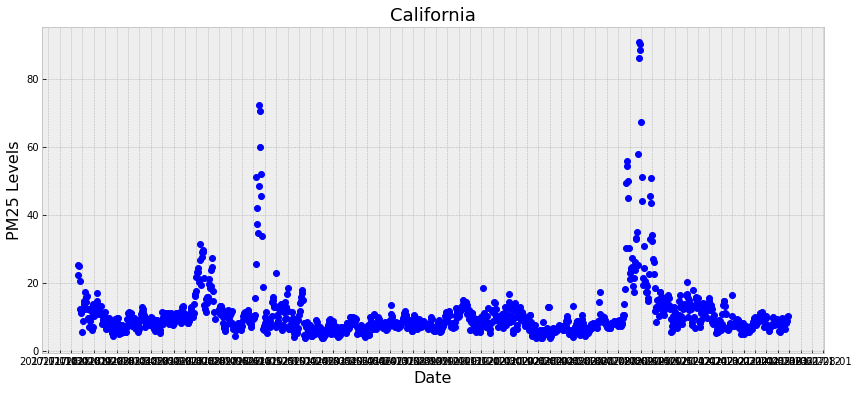

In [8]:
#Graphing the data in a scatter fashion
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(14,6))
ax.plot_date(sorted(wdata.date),wdata.pm25, color='blue')
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel("Date",fontsize=16)
ax.set_ylabel("PM25 Levels",fontsize=16)
ax.set_title("California",fontsize=18)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.show()

In [9]:
wdata.describe()

,pm25,longitude,latitude
count,1226.000000,1.226000e+03,1.226000e+03
mean,10.712528,-1.214936e+02,3.857667e+01
std,8.525707,1.705998e-12,9.240825e-13
min,3.616099,-1.214936e+02,3.857667e+01
25%,6.980721,-1.214936e+02,3.857667e+01
50%,8.610538,-1.214936e+02,3.857667e+01
75%,11.175574,-1.214936e+02,3.857667e+01
max,90.828102,-1.214936e+02,3.857667e+01


Text(0, 0.5, 'Density')

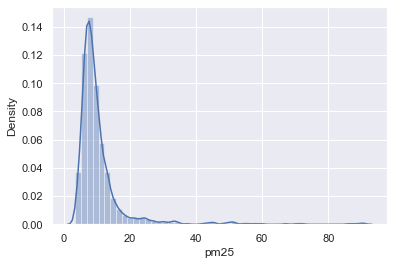

In [10]:
#Graphing a Density Plot
sns.set()
sns.distplot(wdata.pm25)
plt.ylabel("Density")

In [11]:
#Function definition to graph a box and whisker plot without the outliers
df = wdata
def box_dist_plot(Feature):
    f, (ax_box, ax_dist) = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(Feature, data=df, color='blue', ax=ax_box)
    sns.distplot(df[Feature],hist=True, kde=False, color='blue', ax=ax_dist)
    ax_dist.set_ylabel('Counts')
    ax_box.set_xlabel('')
    Q1 = df[Feature].quantile(0.25)
    Q2 = df[Feature].quantile(0.5)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    plt.axvline(8.610537517911, 0,325,color='r',linewidth=2)
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    print('Lower Whisker:',Lower_Whisker, 'Upper Whisker:',Upper_Whisker, 'Median: ',Q2)

In [12]:
#Function definition to remove outliers
def OutlierRemover(Feature):
    global df
    Q1 = df[Feature].quantile(0.25)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df = df[(df[Feature]>Lower_Whisker)&(df[Feature]<Upper_Whisker)]

Lower Whisker: 0.6884422167526791 Upper Whisker: 17.467852577705713 Median:  8.610537517911567


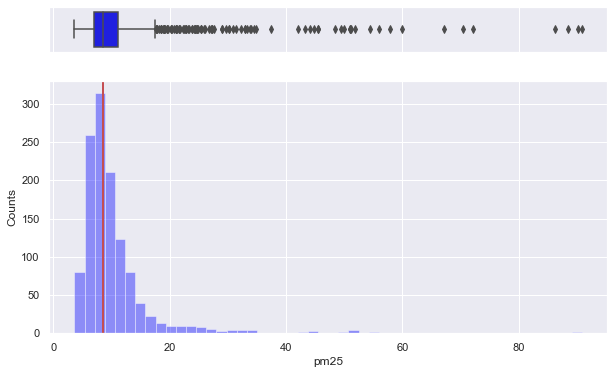

In [13]:
box_dist_plot('pm25')

In [14]:
#Converting date in dataframe into datetime format
wdata['date'] = pd.to_datetime(wdata['date'])
wdata['dayofweek'] = wdata['date'].dt.dayofweek
wdata['month'] = wdata['date'].dt.month
wdata['day'] = wdata['date'].dt.day
wdata['year'] = wdata['date'].dt.year
wdata



,date,state,pm25,longitude,latitude,dayofweek,month,day,year
0,2018-01-01,California,25.318806,-121.493629,38.576668,0,1,1,2018
1,2018-01-02,California,22.212212,-121.493629,38.576668,1,1,2,2018
2,2018-01-03,California,24.836173,-121.493629,38.576668,2,1,3,2018
3,2018-01-04,California,20.468300,-121.493629,38.576668,3,1,4,2018
4,2018-01-05,California,12.290649,-121.493629,38.576668,4,1,5,2018
...,...,...,...,...,...,...,...,...,...
1221,2021-05-27,California,8.097262,-121.493629,38.576668,3,5,27,2021
1222,2021-05-28,California,8.398243,-121.493629,38.576668,4,5,28,2021
1223,2021-05-29,California,8.686022,-121.493629,38.576668,5,5,29,2021
1224,2021-05-30,California,10.050406,-121.493629,38.576668,6,5,30,2021


In [15]:
#Set the index of the dataframe to its date
wdata.set_index('date',inplace=True)
wdata

,state,pm25,longitude,latitude,dayofweek,month,day,year
date,,,,,,,,
2018-01-01,California,25.318806,-121.493629,38.576668,0,1,1,2018
2018-01-02,California,22.212212,-121.493629,38.576668,1,1,2,2018
2018-01-03,California,24.836173,-121.493629,38.576668,2,1,3,2018
2018-01-04,California,20.468300,-121.493629,38.576668,3,1,4,2018
2018-01-05,California,12.290649,-121.493629,38.576668,4,1,5,2018
...,...,...,...,...,...,...,...,...
2021-05-27,California,8.097262,-121.493629,38.576668,3,5,27,2021
2021-05-28,California,8.398243,-121.493629,38.576668,4,5,28,2021
2021-05-29,California,8.686022,-121.493629,38.576668,5,5,29,2021


In [16]:
dly_pm25 = wdata.groupby('date')['pm25'].sum()
dly_pm25.head()

date
2018-01-01    25.318806
2018-01-02    22.212212
2018-01-03    24.836173
2018-01-04    20.468300
2018-01-05    12.290649
Name: pm25, dtype: float64

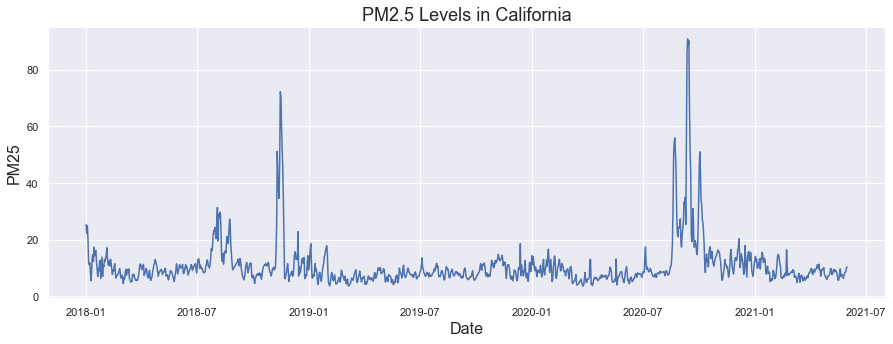

In [17]:
plt.figure(figsize=(15,5))
plt.plot(dly_pm25)
plt.xlabel("Date",fontsize=16)
plt.ylabel("PM25",fontsize=16)
plt.title("PM2.5 Levels in California",fontsize=18)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=17)

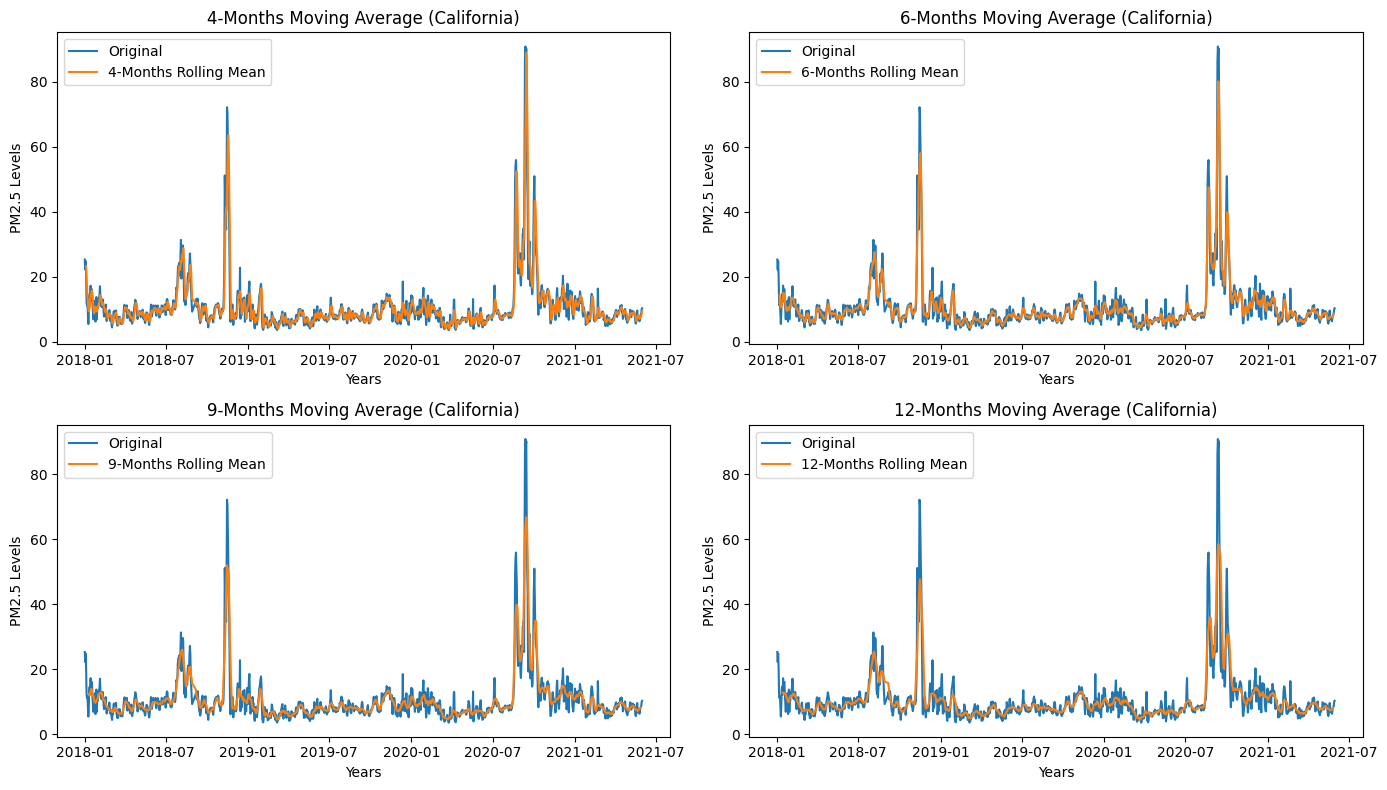

In [18]:
# resetting the axes fonts and sizes
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Rolling average plots
fig, axes = plt.subplots(2,2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(dly_pm25.index,dly_pm25,label='Original')
axes[0][0].plot(dly_pm25.index,dly_pm25.rolling(window=4).mean(),
               label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("PM2.5 Levels")
axes[0][0].set_title("4-Months Moving Average (California)")
axes[0][0].legend(loc='best')

axes[0][1].plot(dly_pm25.index,dly_pm25,label='Original')
axes[0][1].plot(dly_pm25.index,dly_pm25.shift(-2).rolling(window=6).mean(),
               label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("PM2.5 Levels")
axes[0][1].set_title("6-Months Moving Average (California)")
axes[0][1].legend(loc='best')

axes[1][0].plot(dly_pm25.index,dly_pm25,label='Original')
axes[1][0].plot(dly_pm25.index,dly_pm25.shift(-3).rolling(window=9).mean(),
               label='9-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("PM2.5 Levels")
axes[1][0].set_title("9-Months Moving Average (California)")
axes[1][0].legend(loc='best')

axes[1][1].plot(dly_pm25.index,dly_pm25,label='Original')
axes[1][1].plot(dly_pm25.index,dly_pm25.shift(-4).rolling(window=12).mean(),
               label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("PM2.5 Levels")
axes[1][1].set_title("12-Months Moving Average (California)")
axes[1][1].legend(loc='best')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.tight_layout()
plt.show()

## seasonality - Time series Decomposition

In [19]:
wdata.head()

,state,pm25,longitude,latitude,dayofweek,month,day,year
date,,,,,,,,
2018-01-01,California,25.318806,-121.493629,38.576668,0,1,1,2018
2018-01-02,California,22.212212,-121.493629,38.576668,1,1,2,2018
2018-01-03,California,24.836173,-121.493629,38.576668,2,1,3,2018
2018-01-04,California,20.468300,-121.493629,38.576668,3,1,4,2018
2018-01-05,California,12.290649,-121.493629,38.576668,4,1,5,2018


In [20]:
#We will first see how the daily pm2.5 levels vary on a monthwise period
monthly_pm25 = pd.pivot_table(wdata, values="pm25", columns="year",
                              index="month")
monthly_pm25 = monthly_pm25.reindex(index=[1,2,3,4,5,6,7,8,9,10,11,12])
monthly_pm25

year,2018,2019,2020,2021
month,,,,
1,12.997613,10.336605,10.339954,10.347059
2,10.208785,6.159876,9.668404,9.089901
3,7.183285,6.084303,5.805015,7.024602
4,9.014919,6.994159,6.586211,8.887433
5,8.121545,6.684649,6.929854,8.163921
6,9.841378,7.769382,7.014787,NaN
7,12.807647,8.801016,8.861693,NaN
8,19.856539,8.020726,21.085620,NaN
9,9.785653,7.209344,36.191200,NaN


In [21]:
monPM25 = monthly_pm25
monPM25 = monPM25.to_numpy()
print(monPM25[:,2]) #print the third year's PM2.5 values

[10.33995357  9.66840366  5.80501465  6.58621123  6.92985435  7.01478653
  8.86169319 21.08562005 36.19119967 19.21565547 10.99219436 12.59798273]


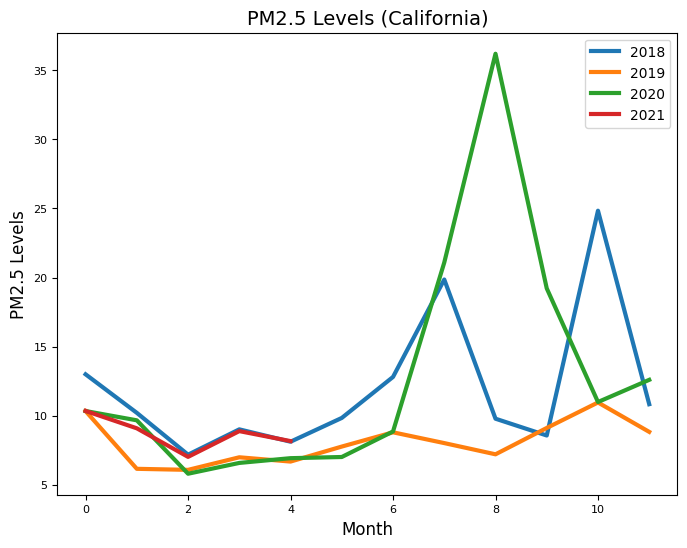

In [22]:
plt.figure(figsize=(8,6))
# plt.plot(monthly_sales,lw=3)
plt.plot(monPM25[:,0],lw=3,label='2018')
plt.plot(monPM25[:,1],lw=3,label='2019')
plt.plot(monPM25[:,2],lw=3,label='2020')
plt.plot(monPM25[:,3],lw=3,label='2021')
plt.xlabel("Month",fontsize=12)
plt.ylabel('PM2.5 Levels',fontsize=12)
plt.title("PM2.5 Levels (California)",fontsize=14)
plt.legend()
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

date
2018-01-01          NaN
2018-01-02          NaN
2018-01-03    22.505562
2018-01-04    19.198374
2018-01-05    14.639675
                ...    
2021-05-27     7.604605
2021-05-28     8.393843
2021-05-29     9.044891
2021-05-30     9.678960
2021-05-31          NaN
Name: pm25, Length: 1226, dtype: float64


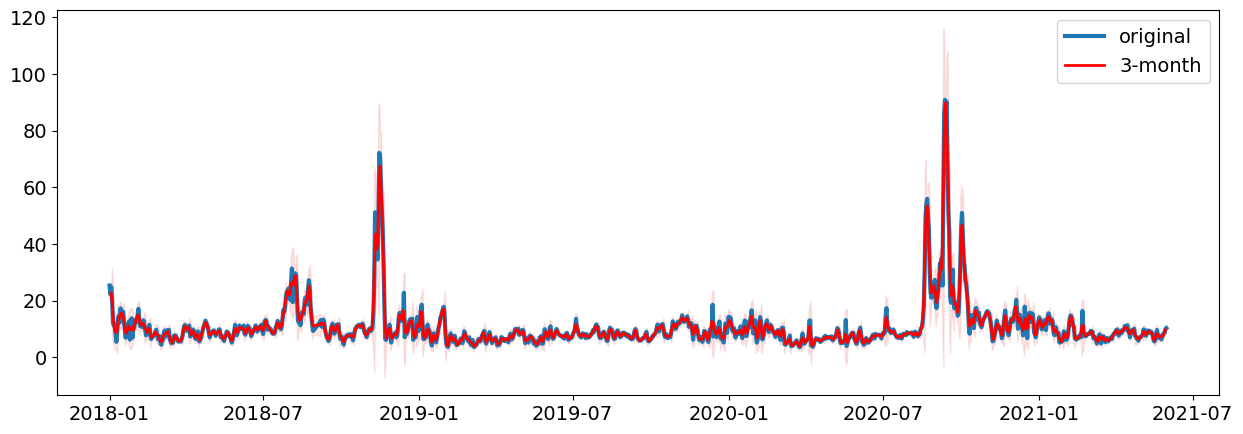

In [23]:
rolling_mean = dly_pm25.shift(-1).rolling(window=3).mean() 
rolling_std = dly_pm25.shift(-1).rolling(window=3).std() 
lower_bound = rolling_mean - (1.96*rolling_std)
upper_bound = rolling_mean + (1.96*rolling_std)

plt.figure(figsize=(15,5))
plt.plot(dly_pm25.index,dly_pm25,label='original',lw=3)
plt.plot(dly_pm25.index,rolling_mean,'g',color='red',lw=2,label='3-month')
plt.fill_between(x=dly_pm25.index, y1=lower_bound, y2=upper_bound,
                    color='lightcoral', alpha=0.2)
plt.legend(loc='best',fontsize=14)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
print(rolling_mean)

## Time series decomposition

In [24]:
dly_pm25

date
2018-01-01    25.318806
2018-01-02    22.212212
2018-01-03    24.836173
2018-01-04    20.468300
2018-01-05    12.290649
                ...    
2021-05-27     8.097262
2021-05-28     8.398243
2021-05-29     8.686022
2021-05-30    10.050406
2021-05-31    10.300450
Name: pm25, Length: 1226, dtype: float64

In [25]:
print(min(dly_pm25))
print(max(dly_pm25))

3.616099338054228
90.82810237475876


In [26]:
# import statsmodels.api as sm
import statsmodels as sm
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(wdata['pm25'], model='additive', extrapolate_trend='freq', period=75)
# decomposition = sm.tsa.seasonal_decompose(dly_pm25, extrapolate_trend=9)

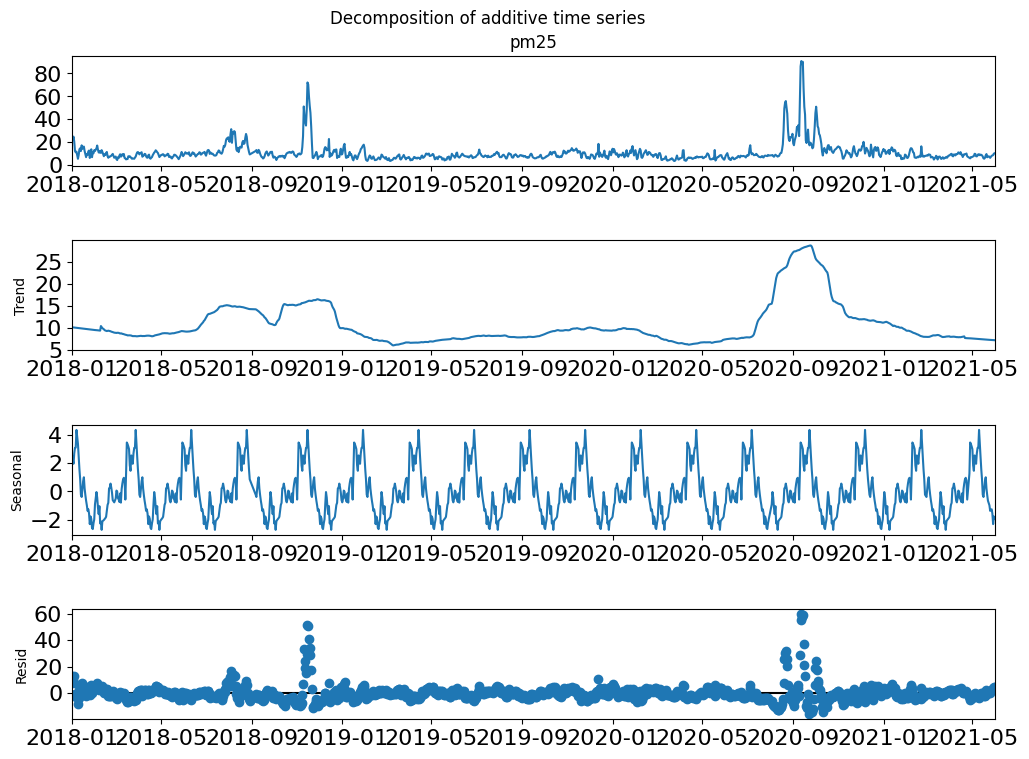

In [27]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
# plt.tight_layout()
plt.show()

**Trying for One Year Period**

In [28]:
# import statsmodels.api as sm
import statsmodels as sm
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ydata['pm25'], model='additive', extrapolate_trend='freq', period=90)
# decomposition = sm.tsa.seasonal_decompose(dly_pm25, extrapolate_trend=9)

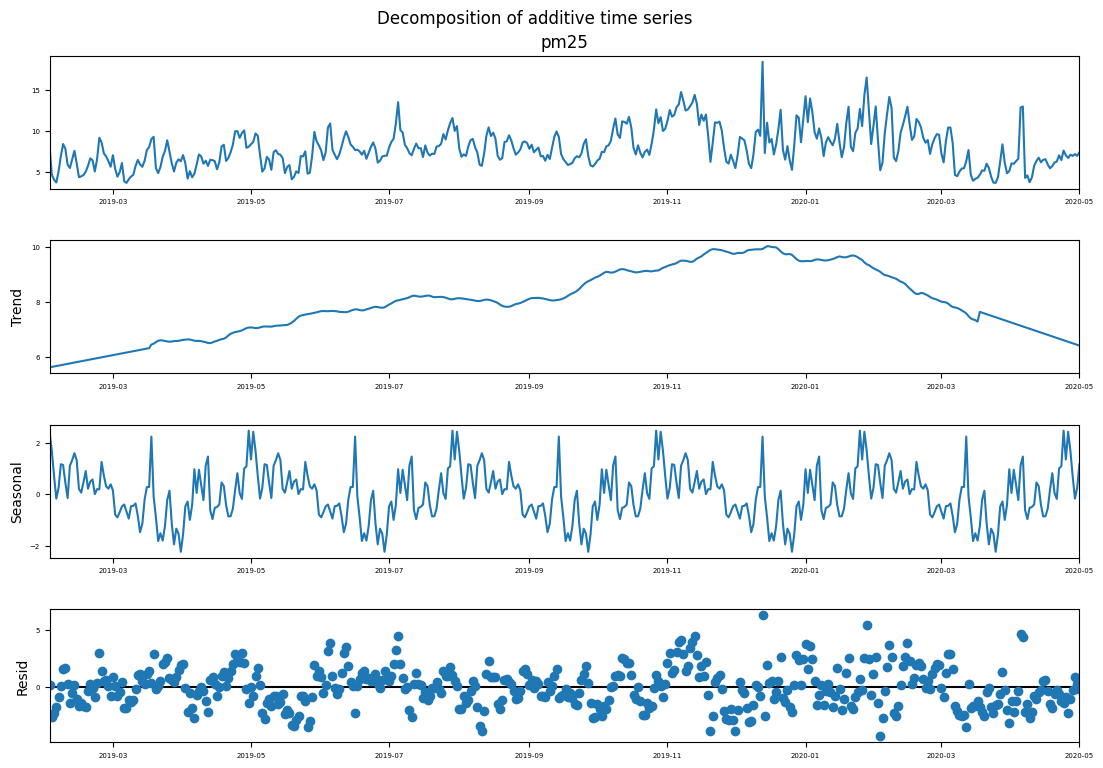

In [29]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
# plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller
print("Dickey-Fuller test results:")
dftest = adfuller(dly_pm25)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                   -3.938300
p-value                           0.001770
#lags Used                       22.000000
Number of Observations Used    1203.000000
Critical Value (1%)              -3.435797
Critical Value (5%)              -2.863946
Critical Value (10%)             -2.568051
dtype: float64


In [31]:
dly_pm25

date
2018-01-01    25.318806
2018-01-02    22.212212
2018-01-03    24.836173
2018-01-04    20.468300
2018-01-05    12.290649
                ...    
2021-05-27     8.097262
2021-05-28     8.398243
2021-05-29     8.686022
2021-05-30    10.050406
2021-05-31    10.300450
Name: pm25, Length: 1226, dtype: float64

**How to Interpret Dickey-Fuller Test Results**
- p-value <= 0.05 (data is stationary, data is not time dependent), reject H0
- p-value > 0.05 (data is not stationary, data is time dependent), do not reject H0

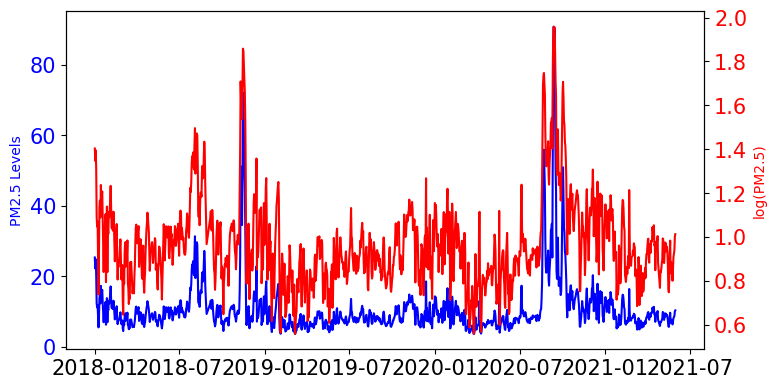

In [30]:
dly_pm25_log = np.log10(dly_pm25)

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(dly_pm25,color='blue')
ax1.set_ylabel("PM2.5 Levels",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(dly_pm25_log,color='red')
ax2.set_ylabel("log(PM2.5)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
fig.tight_layout()
plt.show()

In [31]:
# Dickey-Fuller test to log_dly_pm25
print("Dickey-Fuller test results:")
dftest = adfuller(dly_pm25_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                   -3.741587
p-value                           0.003565
#lags Used                       17.000000
Number of Observations Used    1208.000000
Critical Value (1%)              -3.435775
Critical Value (5%)              -2.863936
Critical Value (10%)             -2.568045
dtype: float64


In [32]:
dly_pm25.diff(1).head()
dly_pm25_diff1 = dly_pm25.diff(1)
dly_pm25_diff1.dropna(inplace=True)

dly_pm25_log_diff1 = dly_pm25_log.diff(1)
dly_pm25_log_diff1.dropna(inplace=True)

In [33]:
# Dickey-Fuller test to log of the difference once
#Difference between present and previous values 
print("Dickey-Fuller test results:")
dftest = adfuller(dly_pm25_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Dickey-Fuller test results:


Test Statistic                -1.221619e+01
p-value                        1.134206e-22
#lags Used                     1.900000e+01
Number of Observations Used    1.205000e+03
Critical Value (1%)           -3.435788e+00
Critical Value (5%)           -2.863942e+00
Critical Value (10%)          -2.568049e+00
dtype: float64

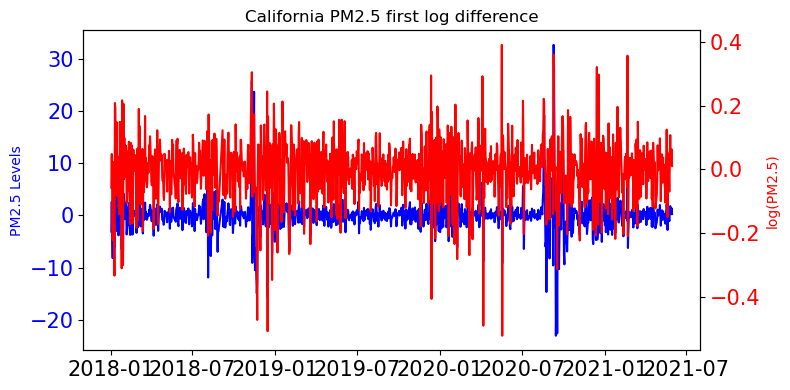

In [34]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(dly_pm25_diff1,color='blue')
ax1.set_ylabel("PM2.5 Levels",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(dly_pm25_log_diff1,color='red')
ax2.set_ylabel("log(PM2.5)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
ax2.set_title("California PM2.5 first log difference")
fig.tight_layout()
plt.show()

In [35]:
dly_pm25_diff2 = dly_pm25.diff(2)
dly_pm25_diff2.dropna(inplace=True)

dly_pm25_log_diff2 = dly_pm25_log.diff(2)
dly_pm25_log_diff2.dropna(inplace=True)

#  Dickey-Fuller test to log_weeksales
print("Dickey-Fuller test results:")
dftest = adfuller(dly_pm25_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller test results:
Test Statistic                -9.641287e+00
p-value                        1.518478e-16
#lags Used                     2.300000e+01
Number of Observations Used    1.200000e+03
Critical Value (1%)           -3.435811e+00
Critical Value (5%)           -2.863952e+00
Critical Value (10%)          -2.568054e+00
dtype: float64


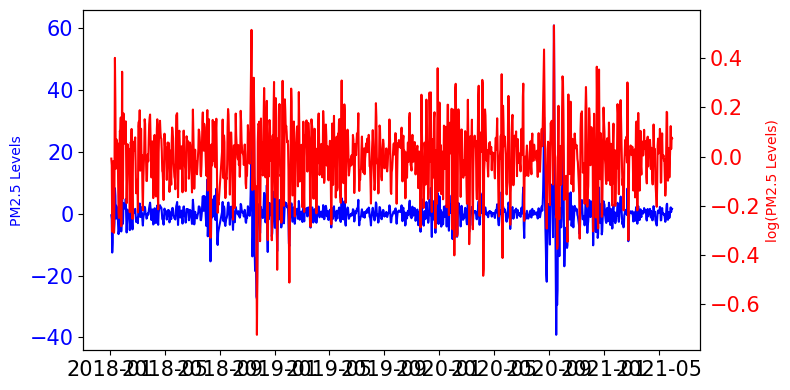

In [36]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(dly_pm25_diff2,color='blue')
ax1.set_ylabel("PM2.5 Levels",color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() #create a second axis that shares same x-axis

ax2.plot(dly_pm25_log_diff2,color='red')
ax2.set_ylabel("log(PM2.5 Levels)",color='red')
ax2.tick_params(axis='y',labelcolor='red')
fig.tight_layout()
plt.show()

## ARIMA model

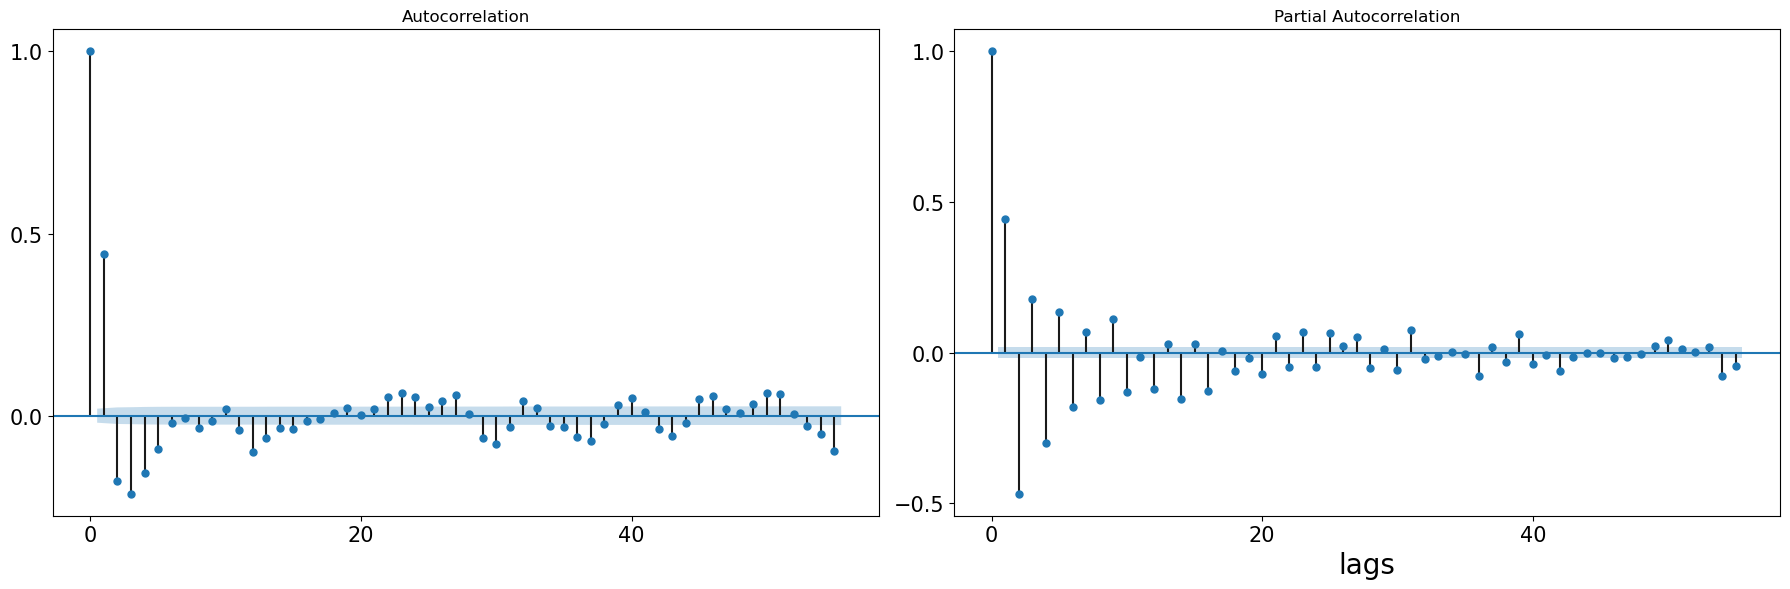

In [37]:
# Difference data to make data stationary (because mean removed)
# The next thing to do make series stationary by removing the upward trend 
# through 1st order differencing.
# differencing (d=1): Y'(t) = Y(t)-Y(t-1)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(dly_pm25_log_diff2, lags=55, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(dly_pm25_log_diff2, lags=55, ax=axes[1], alpha=0.5,method='ols')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.xlabel("lags",color='black',fontsize=20)
plt.tight_layout()

In [38]:
model = sm.tsa.statespace.SARIMAX(dly_pm25_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                  enforce_stationarity=False,enforce_invertibility=False)

In [39]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                pm25   No. Observations:                 1224
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                1185.299
Date:                             Thu, 15 Jul 2021   AIC                          -2362.599
Time:                                     14:49:22   BIC                          -2342.202
Sample:                                          0   HQIC                         -2354.919
                                            - 1224                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0340      0.020      1.721      0.085      -0.005       0.073
ma.L1          1.0000      1.026      0.975      0.330      -1.010       3.010
ar.S.L12      -0.0844      0.026     -3.226      0.001      -0.136      -0.033
sigma2         0.0082      0.008      0.977      0.329      -0.008       0.025
===================================================================================
Ljung-Box (Q):                       86.54   Jarque-Bera (JB):               889.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.63
Prob(H) (two-sided):                  0.16   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

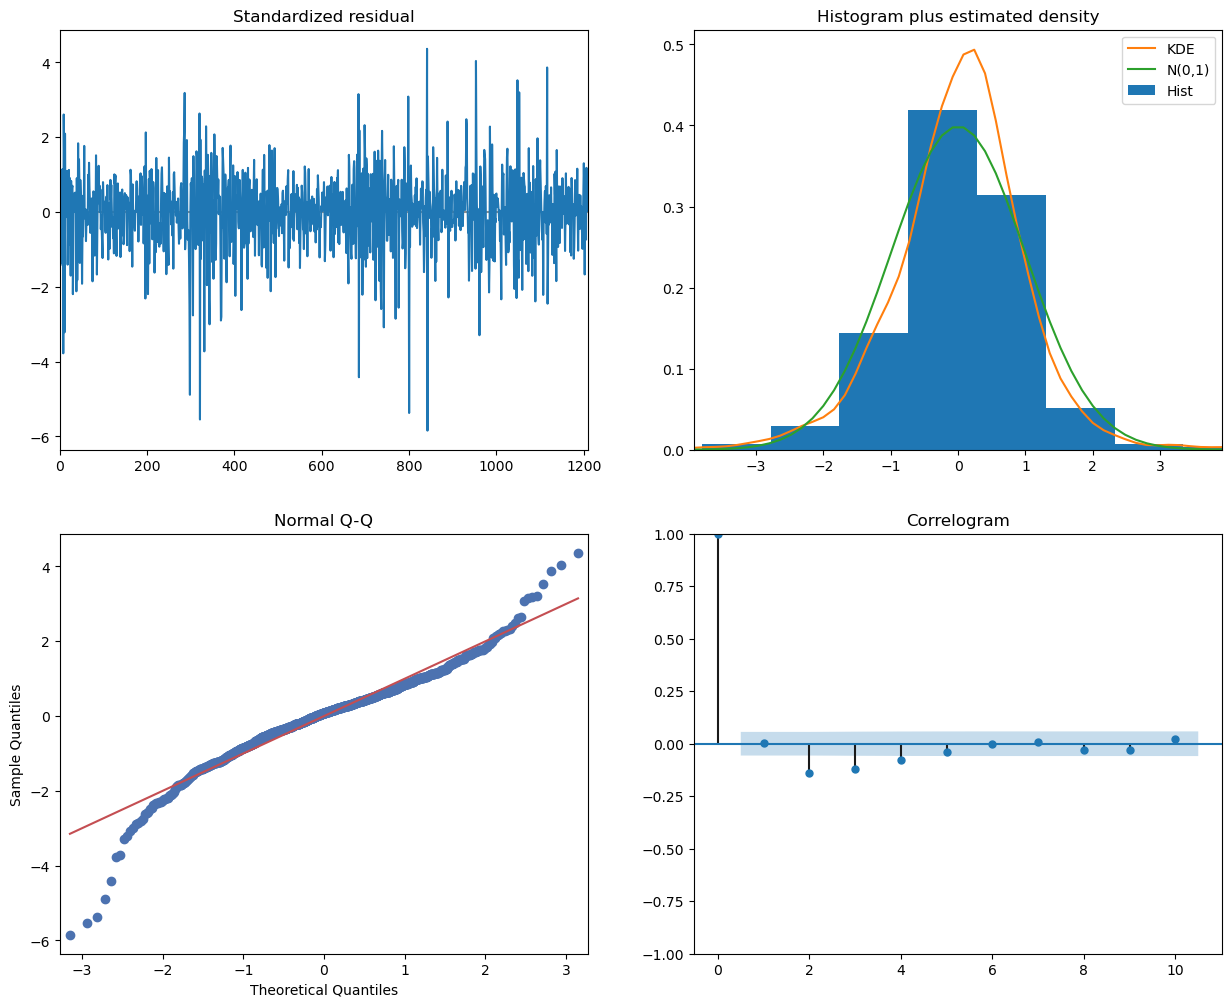

In [40]:
mpl.rcParams.update(mpl.rcParamsDefault)
results.plot_diagnostics(figsize=(15,12))
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.show()

In [41]:
from prophet import Prophet

In [42]:
trdata=wdata.groupby('date')[['pm25']].sum()
trdata.shape

(1226, 1)

In [43]:
trdata.head()

,pm25
date,
2018-01-01,25.318806
2018-01-02,22.212212
2018-01-03,24.836173
2018-01-04,20.468300
2018-01-05,12.290649


In [44]:
trdata['ds'] = trdata.index
trdata.head()

,pm25,ds
date,,
2018-01-01,25.318806,2018-01-01
2018-01-02,22.212212,2018-01-02
2018-01-03,24.836173,2018-01-03
2018-01-04,20.468300,2018-01-04
2018-01-05,12.290649,2018-01-05


In [45]:
trdata = trdata[['ds', 'pm25']].rename(columns={'ds': 'ds', 'pm25': 'y'})

In [46]:
pm25_model = Prophet(seasonality_mode='additive',interval_width=0.95,daily_seasonality=True)
pm25_model.fit(trdata)

In [47]:
pm25_forecast = pm25_model.make_future_dataframe(periods=60, freq='D')
pm25_forecast = pm25_model.predict(pm25_forecast)

In [48]:
pm25_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,22.990655,0.315753,28.432158,22.990655,22.990655,-8.158704,-8.158704,-8.158704,-9.249166,...,-0.042068,-0.042068,-0.042068,1.132530,1.132530,1.132530,0.0,0.0,0.0,14.831950
1,2018-01-02,22.981834,0.363931,27.438311,22.981834,22.981834,-8.740934,-8.740934,-8.740934,-9.249166,...,-0.431918,-0.431918,-0.431918,0.940150,0.940150,0.940150,0.0,0.0,0.0,14.240900
2,2018-01-03,22.973012,0.911432,28.659329,22.973012,22.973012,-8.876953,-8.876953,-8.876953,-9.249166,...,-0.352719,-0.352719,-0.352719,0.724932,0.724932,0.724932,0.0,0.0,0.0,14.096059
3,2018-01-04,22.964191,0.555618,27.935846,22.964191,22.964191,-8.704375,-8.704375,-8.704375,-9.249166,...,0.052308,0.052308,0.052308,0.492483,0.492483,0.492483,0.0,0.0,0.0,14.259816
4,2018-01-05,22.955370,0.722829,28.914409,22.955370,22.955370,-8.577632,-8.577632,-8.577632,-9.249166,...,0.422884,0.422884,0.422884,0.248650,0.248650,0.248650,0.0,0.0,0.0,14.377738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2021-07-26,19.409005,-2.202975,26.320338,19.080869,19.727134,-8.635876,-8.635876,-8.635876,-9.249166,...,-0.042068,-0.042068,-0.042068,0.655358,0.655358,0.655358,0.0,0.0,0.0,10.773128
1282,2021-07-27,19.394769,-3.783011,24.302315,19.053793,19.722875,-8.852167,-8.852167,-8.852167,-9.249166,...,-0.431918,-0.431918,-0.431918,0.828917,0.828917,0.828917,0.0,0.0,0.0,10.542602
1283,2021-07-28,19.380534,-3.254905,24.345958,19.030463,19.722834,-8.610994,-8.610994,-8.610994,-9.249166,...,-0.352719,-0.352719,-0.352719,0.990890,0.990890,0.990890,0.0,0.0,0.0,10.769539
1284,2021-07-29,19.366298,-3.276165,24.698235,19.007655,19.719078,-8.055300,-8.055300,-8.055300,-9.249166,...,0.052308,0.052308,0.052308,1.141558,1.141558,1.141558,0.0,0.0,0.0,11.310998


(array([736634., 736815., 736999., 737180., 737364., 737546., 737730.,
        737911.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 1800x600 with 0 Axes>

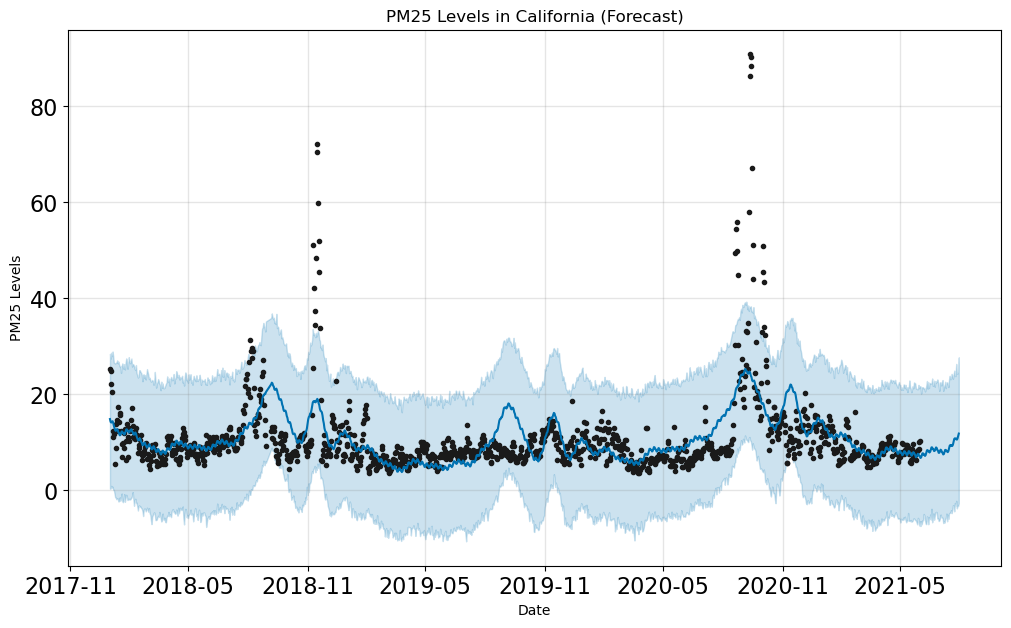

In [49]:
plt.figure(figsize=(18, 6))
pm25_model.plot(pm25_forecast, xlabel = 'Date', ylabel = 'PM25 Levels')
plt.title('PM25 Levels in California (Forecast)');
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

## Trends and pattern using timeseries data

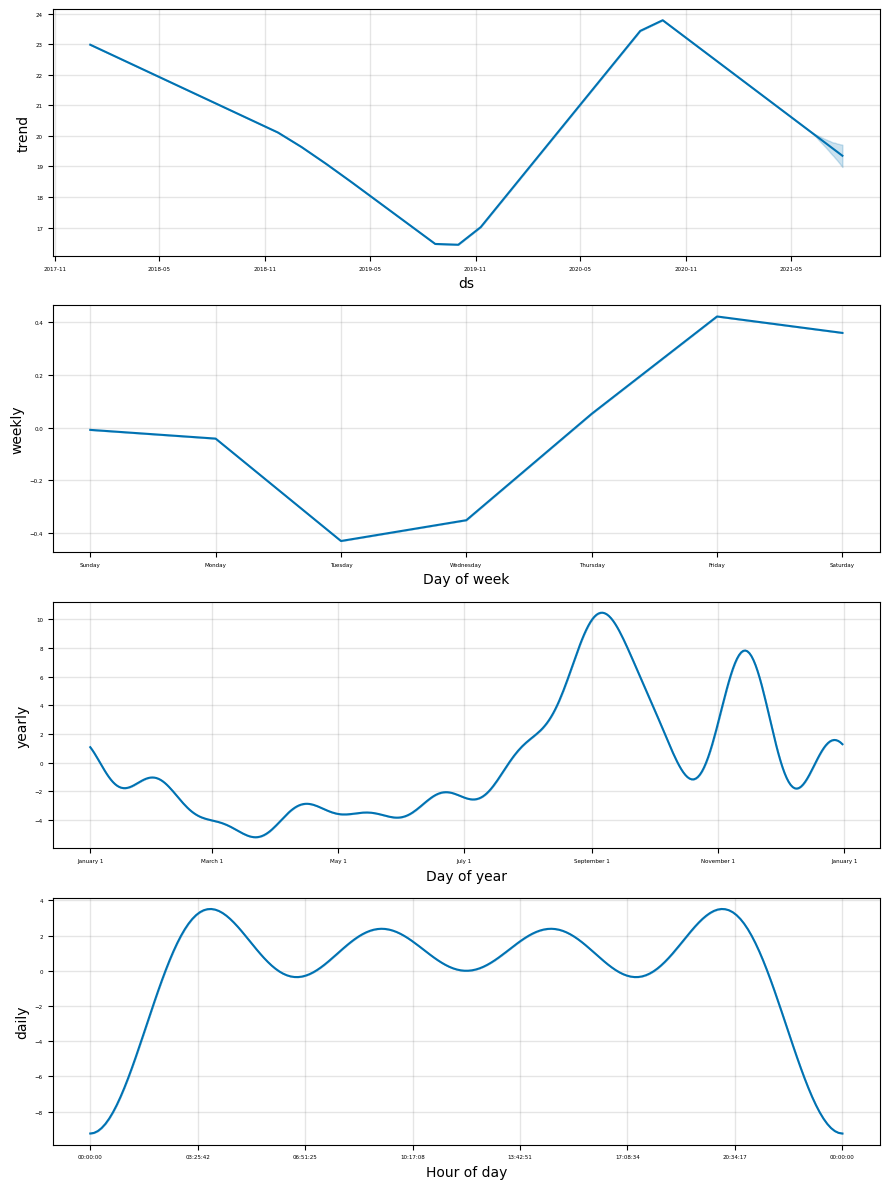

In [50]:
##We can use the Prophet Models to inspect different trends of these
# two categories in the data
fig = pm25_model.plot_components(pm25_forecast);

